# Import necessary packages

In [6]:
import os
os.chdir('E:/github/MWFormer')
from data.Data import DataTran
from model.TrainModel import Predict,dataset_sep
from data.Data import LengthFilter,GetWeight,Pad_data
import torch
import pickle
from model.Model import MWFormer
from data.utils import PlotResults,PredIndependent,CalWeights
import numpy as np
import pandas as pd

# Load model


In [2]:
batch_size = 32
lr = 5e-4
epochs = 10
vocab_size = 1000
hidden = 256 
n_layers = 6
attn_heads = 8
dropout = 0
maxlen = 1000

model_file = 'model/model.pkl'
model = MWFormer(vocab_size,hidden, n_layers, attn_heads, dropout)
model.load_state_dict(torch.load(model_file))

<All keys matched successfully>

# Load data

In [3]:
independent_file = 'EIMSdata/test_11499.csv'
independent_data = pd.read_csv(independent_file)

# Using the WeightFormer model to predict

In [4]:
smiles_i,true_weights_i,predict_weights_i = PredIndependent(model,independent_data,batch_size,maxlen)

 52%|██████████████████████████████████████▍                                   | 5968/11499 [00:00<00:00, 13281.22it/s][17:16:46] Conflicting single bond directions around double bond at index 1.
[17:16:46]   BondStereo set to STEREONONE and single bond directions set to NONE.
 63%|██████████████████████████████████████████████▉                           | 7301/11499 [00:00<00:00, 12385.83it/s][17:16:46] Conflicting single bond directions around double bond at index 4.
[17:16:46]   BondStereo set to STEREONONE and single bond directions set to NONE.
100%|█████████████████████████████████████████████████████████████████████████| 11499/11499 [00:00<00:00, 65325.01it/s]
360it [01:14,  4.84it/s]


# Calculate evaluation indicators

In [7]:
rmse_i,mae_i = CalWeights(true_weights_i,predict_weights_i)
print(rmse_i,mae_i)

26.536125 17.765781


# Plot results

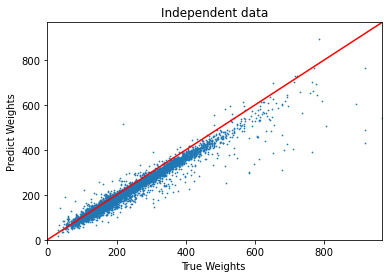

In [8]:
PlotResults(true_weights_i,predict_weights_i,'Independent data')

# Tip: Both the model and sample data are stored in the release. First, you should download the model and data from the release, and then place the model in the model folder and the data in the EIMSdata folder